# Import Libraries

In [2]:
import os
from os import listdir
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Import Datasets

In [3]:
image_bengin="Dataset2/FNA/benign/"
image_maligant = "Dataset2/FNA/malignant/"
image_test = "Dataset2/test/"

making it into an array

In [4]:
bengin_image_data=[]
maligant_image_data=[]
unlabel_image_data=[]

for i in os.listdir(image_bengin):
    if i.endswith(".png") or i.endswith(".jpg"):  
        image = load_img(os.path.join(image_bengin, i), target_size=(224, 224)) 
        array_value_image = img_to_array(image)
        bengin_image_data.append(array_value_image)

for i in os.listdir(image_maligant):
    if i.endswith(".png") or i.endswith(".jpg"):  
        image = load_img(os.path.join(image_maligant, i), target_size=(224, 224)) 
        array_value_image = img_to_array(image)
        maligant_image_data.append(array_value_image)

for i in os.listdir(image_test):
    if i.endswith(".png") or i.endswith(".jpg"):  
        image = load_img(os.path.join(image_test, i), target_size=(224, 224)) 
        array_value_image = img_to_array(image)
        unlabel_image_data.append(array_value_image)

bengin_image_data = np.array(bengin_image_data, dtype="float32")
maligant_image_data = np.array(maligant_image_data, dtype="float32")
unlabel_image_data = np.array(unlabel_image_data, dtype="float32")

In [5]:
bengin_label_data=[]
maligant_label_data=[]

for i in range(len(bengin_image_data)):
    bengin_label_data.append(1)

for i in range(len(maligant_image_data)):
    maligant_label_data.append(0)

In [6]:
print((bengin_image_data).shape)
bengin_image_data

(1074, 224, 224, 3)


array([[[[244., 239., 241.],
         [244., 239., 241.],
         [244., 239., 241.],
         ...,
         [235., 224., 234.],
         [235., 224., 234.],
         [235., 224., 234.]],

        [[244., 239., 241.],
         [244., 239., 241.],
         [244., 239., 241.],
         ...,
         [235., 224., 234.],
         [235., 224., 234.],
         [235., 224., 234.]],

        [[244., 239., 241.],
         [244., 239., 241.],
         [244., 239., 241.],
         ...,
         [235., 224., 234.],
         [235., 224., 234.],
         [235., 224., 234.]],

        ...,

        [[242., 239., 245.],
         [242., 239., 245.],
         [242., 239., 245.],
         ...,
         [218., 183., 206.],
         [218., 183., 206.],
         [218., 183., 206.]],

        [[242., 239., 245.],
         [242., 239., 245.],
         [242., 239., 245.],
         ...,
         [218., 183., 206.],
         [218., 183., 206.],
         [218., 183., 206.]],

        [[242., 239., 245.],
       

In [7]:
print((maligant_image_data).shape)
maligant_image_data

(650, 224, 224, 3)


array([[[[120.,  68., 121.],
         [120.,  68., 121.],
         [120.,  68., 121.],
         ...,
         [143.,  88., 138.],
         [143.,  88., 138.],
         [143.,  88., 138.]],

        [[120.,  68., 121.],
         [120.,  68., 121.],
         [120.,  68., 121.],
         ...,
         [143.,  88., 138.],
         [143.,  88., 138.],
         [143.,  88., 138.]],

        [[120.,  68., 121.],
         [120.,  68., 121.],
         [120.,  68., 121.],
         ...,
         [143.,  88., 138.],
         [143.,  88., 138.],
         [143.,  88., 138.]],

        ...,

        [[114.,  70., 128.],
         [114.,  70., 128.],
         [114.,  70., 128.],
         ...,
         [ 98.,  60., 107.],
         [ 98.,  60., 107.],
         [ 98.,  60., 107.]],

        [[114.,  70., 128.],
         [114.,  70., 128.],
         [114.,  70., 128.],
         ...,
         [ 98.,  60., 107.],
         [ 98.,  60., 107.],
         [ 98.,  60., 107.]],

        [[114.,  70., 128.],
       

In [8]:
print((unlabel_image_data).shape)
unlabel_image_data

(14, 224, 224, 3)


array([[[[219., 159., 201.],
         [219., 159., 201.],
         [219., 159., 201.],
         ...,
         [214., 168., 209.],
         [214., 168., 209.],
         [214., 168., 209.]],

        [[219., 159., 201.],
         [219., 159., 201.],
         [219., 159., 201.],
         ...,
         [214., 168., 209.],
         [214., 168., 209.],
         [214., 168., 209.]],

        [[219., 159., 201.],
         [219., 159., 201.],
         [219., 159., 201.],
         ...,
         [214., 168., 209.],
         [214., 168., 209.],
         [214., 168., 209.]],

        ...,

        [[248., 244., 247.],
         [248., 244., 247.],
         [248., 244., 247.],
         ...,
         [245., 245., 246.],
         [245., 245., 246.],
         [245., 245., 246.]],

        [[248., 244., 247.],
         [248., 244., 247.],
         [248., 244., 247.],
         ...,
         [245., 245., 246.],
         [245., 245., 246.],
         [245., 245., 246.]],

        [[248., 244., 247.],
       

normalization of array

In [9]:
def nor(image):
    image_data = image / (255.0) 
    final_image_data = np.where(image_data > 0.5, 1, 0)
    return final_image_data     

In [10]:
new_bengin_image_data=nor(bengin_image_data)
new_maligant_image_data=nor(maligant_image_data)
new_unlabel_image_data=nor(unlabel_image_data)

In [11]:
new_bengin_image_data

array([[[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        ...,

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]],


       [[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1,

In [12]:
new_maligant_image_data

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 0, 1],
         [1, 0, 1],
         [1, 0, 1]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 0, 1],
         [1, 0, 1],
         [1, 0, 1]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 0, 1],
         [1, 0, 1],
         [1, 0, 1]],

        ...,

        [[0, 0, 1],
         [0, 0, 1],
         [0, 0, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 1],
         [0, 0, 1],
         [0, 0, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 1],
         [0, 0, 1],
         [0, 0, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[1, 0, 1],
         [1, 0, 1],
         [1, 0, 1],
         ...,
         [1, 0, 1],
         [1, 0, 1],
         [1, 0, 1]],

        [[1, 0, 1],
         [1,

In [13]:
new_unlabel_image_data

array([[[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        ...,

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]],


       [[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1,

In [14]:
x = np.concatenate((new_bengin_image_data, new_maligant_image_data))
y = np.concatenate((bengin_label_data,maligant_label_data))
print(x)
print(y)

[[[[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  ...

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]]


 [[[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  ...

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]]


 [[[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1

training the data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
import tensorflow 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

CNN.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss= tensorflow.keras.losses.BinaryCrossentropy(), metrics=tensorflow.keras.metrics.BinaryAccuracy())
fit_model = CNN.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
44/44 [==============================] - 19s 411ms/step - loss: 0.5426 - binary_accuracy: 0.8579 - val_loss: 0.2110 - val_binary_accuracy: 0.9391
Epoch 2/10
44/44 [==============================] - 21s 473ms/step - loss: 0.2852 - binary_accuracy: 0.9101 - val_loss: 0.1825 - val_binary_accuracy: 0.9362
Epoch 3/10
44/44 [==============================] - 21s 488ms/step - loss: 0.2340 - binary_accuracy: 0.9181 - val_loss: 0.1414 - val_binary_accuracy: 0.9565
Epoch 4/10
44/44 [==============================] - 21s 487ms/step - loss: 0.1919 - binary_accuracy: 0.9384 - val_loss: 0.1221 - val_binary_accuracy: 0.9536
Epoch 5/10
44/44 [==============================] - 21s 485ms/step - loss: 0.1701 - binary_accuracy: 0.9427 - val_loss: 0.1196 - val_binary_accuracy: 0.9507
Epoch 6/10
44/44 [==============================] - 21s 487ms/step - loss: 0.1166 - binary_accuracy: 0.9637 - val_loss: 0.1572 - val_binary_accuracy: 0.9362
Epoch 7/10
44/44 [==============================] - 21s 48

# Training and Validation

In [19]:
loss_CNN , accuracy_CNN = CNN.evaluate(x_test, y_test)

11/11 [==============================] - 1s 112ms/step - loss: 0.2300 - binary_accuracy: 0.9362


CNN Validation Accuracy :  0.9362319111824036


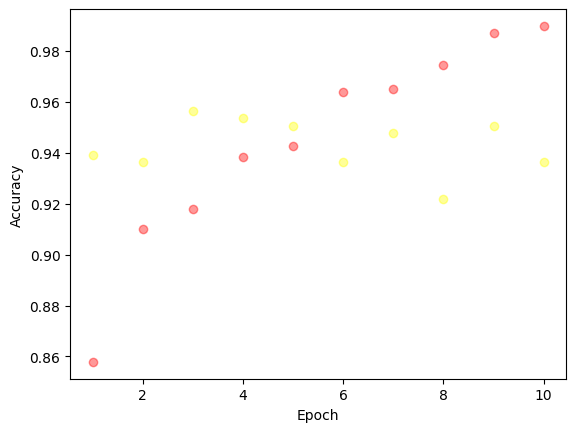

In [20]:
print("CNN Validation Accuracy : ", accuracy_CNN)
epoch_accuracy = range(1, len(fit_model.history['binary_accuracy']) + 1)
plt.scatter(epoch_accuracy, fit_model.history['binary_accuracy'], label='Training Accuracy', color='red', alpha=0.4)
plt.scatter(epoch_accuracy, fit_model.history['val_binary_accuracy'], label='Validation Accuracy', color='yellow', alpha=0.4)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

CNN Validation Loss :  0.229956716299057


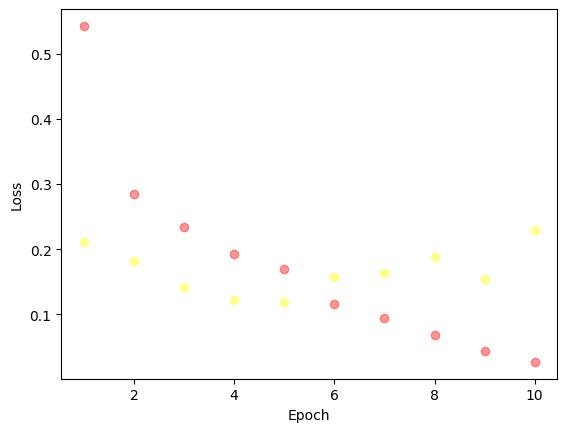

In [22]:
print("CNN Validation Loss : ", loss_CNN)
epoch_loss = range(1, len(fit_model.history['loss']) + 1)
plt.scatter(epoch_loss, fit_model.history['loss'], label='Training Loss', color='red', alpha=0.4)
plt.scatter(epoch_loss, fit_model.history['val_loss'], label='Validation Loss', color='yellow', alpha=0.4)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Prediction of the test dataset

In [23]:
pre_label = CNN.predict(new_unlabel_image_data)
pre_data = (pre_label > 0.5).astype(int)
n_benign=0
n_maligant=0
test_pre_data=[]
for pre_label in pre_data:
    if pre_label == 1:
        test_pre_data.append("Benign")
        n_benign=n_benign+1
    elif pre_label == 0:
        test_pre_data.append("Maligant")
        n_maligant=n_maligant+1

print("Test data prediction : ",test_pre_data)
print("Number of Benign in test data : ",n_benign)
print("Number of Malignant in test data : ",n_maligant)

1/1 [==============================] - 0s 110ms/step
Test data prediction :  ['Benign', 'Benign', 'Maligant', 'Benign', 'Maligant', 'Benign', 'Benign', 'Maligant', 'Maligant', 'Maligant', 'Benign', 'Maligant', 'Maligant', 'Benign']
Number of Benign in test data :  7
Number of Malignant in test data :  7
